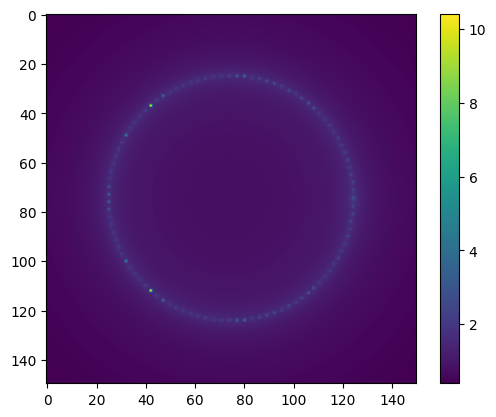

In [1]:
import numpy as np
epsilon0=1
k=1/(4*np.pi*epsilon0)
#点电荷再空间某点产生的计算电势
def point(r0,r,q):
    '''任何维度通用'''
    dim=len(r0)#获取维数
    #代码：r0与r维数不一致时强行退出
    R=r-r0#只有np.array创造的向量才能进行加减运算,直接用[]创建的是列表,会报错
    norm=np.linalg.norm(R)
    potential=k*q/norm
    E=np.zeros(dim)
    for n in range(dim):
        E[n]=k*q*R[n]/norm**3
    return potential,E
#圆环在空间某点产生的电势
R,Q=1,10
Ntheta=100
thetalist=np.linspace(0,2*np.pi,Ntheta)
def ring(r):
    '''可以改变电荷分布方程来表现任何电荷分布在空间中的势与场'''
    x0list=np.cos(thetalist)*R#圆环的中心在原点
    y0list=np.sin(thetalist)*R
    delta_L=R*(thetalist[1]-thetalist[0])
    Lamda=Q/(2*np.pi*R)
    deltaq=Lamda*delta_L
    N=len(x0list)
    potential=0
    E=np.zeros(2)
    for n in range(N):
        r0n=np.array((x0list[n],y0list[n]))
        phin,En=point(r0n,r,deltaq)
        potential=potential+phin
        E=E+En
    return potential,E
#圆环在全空间产生的电势
Nx,Ny=150,150
xlist=np.linspace(-1.5,1.5,Nx)
ylist=np.linspace(-1.5,1.5,Ny)
xmat,ymat=np.meshgrid(xlist,ylist)
phimat=np.zeros((Nx,Ny))
for i in range(Nx):
    xi=xlist[i]
    for j in range(Ny):
        yj=ylist[j]
        r=np.array((xi,yj))
        phir,Er=ring(r)
        phimat[j,i]=phir
#作图
import matplotlib.pyplot as plt
plt.imshow(phimat)
plt.colorbar()
plt.show()
#怎么把图片画地既清楚又明亮
#还有电场图
#如何把坐标去掉
#各参数影响什么(图片清晰度,运行时间)
#这个程序的计算量有多大,如果是三维的计算量又会有多大,以此判定能否计算三维问题